## GTNNWR Case--spatial and temporal distribution of key nutrients in coastal waters

### Case Introduction 

- A spatiotemporal-intelligent method for fine-scale retrieval of DSi in coastal seas  
This case shows a spatiotemporally weighted intelligent method acquired high-resolution and long-term distributions of coastal dissolved silicate (DSi). Fine-scale DSi changes and influences driven by biological and physical factors were observed and revealed in coastal seas.  


###  Case Background

The migration of dissolved silicate (DSi) from land to coastal environments is an important component of the global biogeochemical cycle. Due to the strong land-ocean interaction in coastal waters, the spatial distribution of coastal DSi exhibits irregular characteristics (influenced by land input and ocean terrain), and the time changes rapidly with brief periodic fluctuations (influenced by biological effects and ocean currents). However, due to the immaturity of spatiotemporal modeling and the low resolution of data sampling, current research on coastal DSi typically depicts its rough changes with spatial and seasonal temporal resolutions of hundreds of kilometers. Therefore, this project will combine advanced spatiotemporal analysis models and high-resolution datasets to analyze changes in the distribution of offshore DSi at higher spatiotemporal resolutions.
> [Qi, J., Du, Z., Wu, S., Chen, Y., & Wang, Y. (2023). A spatiotemporally weighted intelligent method for exploring fine-scale distributions of surface dissolved silicate in coastal seas. Science of The Total Environment , 886, 163981.  ](https://doi.org/10.1016/j.scitotenv.2023.163981)  

### Data used
- The DSi dataset of Zhejiang offshore surface from 2010 to 2018 (obtained by matching the MODIS remote sensing dataset with the dissolved silicate site dataset on the offshore surface).

### Case Process 
- Dependency Library Installation 
- Dataset Import 
- Model Settings 
- Model Training 
- Model Result Output

### Schematic diagram of the research area

![Image Name](https://mydde.deep-time.org/s3/static-files/upload/upload/1695121607986_1.jpg)  


#### Install the gnnwr model library 
The gnnwr model library includes the GNNWR model and GTNNWR model, supporting high-precision spatiotemporal non-stationary and complex nonlinear modeling. Its installation method is as follows:
```bash  
pip install gnnwr  
```

#### Dependency Library Installation

In [1]:
import os
import sys
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from gnnwr.datasets import init_dataset
from gnnwr.models import GTNNWR

In [2]:
data = pd.read_csv('../data/demo_data_gtnnwr.csv')

#### Dataset Import   
- Through the "init_dataset()" function, users can set input data, test set size, validation set size, independent variable, dependent variable, spatial attribute, time attribute, numbered column, random seed, and batch size.
- The initialized dataset can be saved using the "save()" method and the read method can be used to "read()" the saved results.

In [3]:
data["id"] = np.arange(len(data))
train_dataset, val_dataset, test_dataset = init_dataset(data=data,
                                                        test_ratio=0.15,
                                                        valid_ratio=0.1,
                                                        x_column=['refl_b01', 'refl_b02',\
                                                        'refl_b03','refl_b04','refl_b05',\
                                                        'refl_b07'],
                                                        y_column=['SiO3'],
                                                        spatial_column=['proj_x', 'proj_y'],
                                                        temp_column=['day'],
                                                        id_column=['id'],
                                                        sample_seed=48,
                                                        batch_size=64)

x_min:[ 1.  0.  7. 58.  0.  7.];  x_max:[7307. 7092. 7179. 7808. 8596. 4352.]
y_min:[0.029];  y_max:[7.82]


#### Model Settings  
- The model accepts parameters such as training set, validation set, test set, hidden layer, and optimizer, and can set network structure, optimizer type, and learning rate adjustment method.
- The "add_graph()" function can be used to save the graph structure (chart) of the model, which can be viewed in Tensorboard.

In [4]:
optimizer_params = {
    "maxlr": 0.045,
    "minlr": 0.005,
    "upepoch": 1500,
    "decayepoch": 1750,
    "decayrate": 0.96,
    "stop_change_epoch": 3000,
    "stop_lr": 0.001,
}
gtnnwr = GTNNWR(train_dataset, val_dataset, test_dataset, [[3], [1024,256,32]],drop_out=0.4,optimizer='SGD',optimizer_params=optimizer_params,
                model_name="GTNNWR_DSi")
gtnnwr.add_graph()

Add Graph Successfully


#### Model Training  
- 使用run方法可以进行模型训练，并可以设置训练步长和早停步长。

In [5]:
gtnnwr.run(5000,1000,500)

  0%|          | 0/5000 [00:00<?, ?it/s]

 10%|█         | 500/5000 [02:26<21:25,  3.50it/s] 


Epoch:  500
learning rate:  0.017
Train Loss:  0.37248174301564774
Train R2: 0.35310
Train RMSE: 0.61031
Train AIC: 4112.83750
Train AICc: 4116.95850
Valid Loss:  0.31118243932724
Valid R2: 0.41610 

Best R2: 0.42567 



 20%|██        | 1000/5000 [04:46<18:07,  3.68it/s]


Epoch:  1000
learning rate:  0.029
Train Loss:  0.30276996852874544
Train R2: 0.47417
Train RMSE: 0.55025
Train AIC: 3653.02811
Train AICc: 3656.32495
Valid Loss:  0.2485053390264511
Valid R2: 0.53371 

Best R2: 0.53371 



 30%|███       | 1500/5000 [07:04<17:21,  3.36it/s]


Epoch:  1500
learning rate:  0.041
Train Loss:  0.2753486789363416
Train R2: 0.52180
Train RMSE: 0.52474
Train AIC: 3442.36706
Train AICc: 3445.24194
Valid Loss:  0.264316201210022
Valid R2: 0.50404 

Best R2: 0.61756 



 40%|████      | 2000/5000 [09:24<15:15,  3.28it/s]


Epoch:  2000
learning rate:  0.016893596102719594
Train Loss:  0.1409142074309904
Train R2: 0.75527
Train RMSE: 0.37539
Train AIC: 1955.88778
Train AICc: 1957.36035
Valid Loss:  0.1542057991027832
Valid R2: 0.71065 

Best R2: 0.73803 



 50%|█████     | 2500/5000 [11:41<10:46,  3.87it/s]


Epoch:  2500
learning rate:  0.002194238135242549
Train Loss:  0.08738752976294947
Train R2: 0.84823
Train RMSE: 0.29561
Train AIC: 895.65258
Train AICc: 896.83783
Valid Loss:  0.13933072984218597
Valid R2: 0.73856 

Best R2: 0.75045 



 60%|██████    | 3000/5000 [13:58<09:01,  3.70it/s]


Epoch:  3000
learning rate:  0.0002850003613722963
Train Loss:  0.0919437924313513
Train R2: 0.84032
Train RMSE: 0.30322
Train AIC: 1008.43304
Train AICc: 1008.92072
Valid Loss:  0.13894116878509521
Valid R2: 0.73929 

Best R2: 0.75045 



 67%|██████▋   | 3355/5000 [15:37<07:39,  3.58it/s]

Training stop! Model has not been improved for over 1000 epochs.


Best_r2: 0.7504501158816598


#### Model Result Output  
- Using 'result()' can obtain the basic information of the optimal model and the running results of the model on the test set
- Using 'reg_result()' can save the running results of the optimal model on the entire dataset, including the spatiotemporal non-stationary weights calculated by the model.

In [6]:
gtnnwr.result()

--------------------Model Information-----------------
Model Name:           | GTNNWR_DSi
independent variable: | ['refl_b01', 'refl_b02', 'refl_b03', 'refl_b04', 'refl_b05', 'refl_b07']
dependent variable:   | ['SiO3']

OLS coefficients: 
x0: 7.70582
x1: 0.80789
x2: 0.35238
x3: -7.27009
x4: 2.71207
x5: -2.70717
Intercept: 1.14341

--------------------Result Information----------------
Test Loss: |                   0.13995
Test R2  : |                   0.74423
Train R2 : |                   0.83528
Valid R2 : |                   0.75045
RMSE: |                        0.37410
AIC:  |                      386.94701
AICc: |                      387.53305
F1:   |                        0.24783
F2:   |                       -1.57852
f3_param_0: |                 10.14887
f3_param_1: |                 21.86051
f3_param_2: |                  2.94636
f3_param_3: |                  0.19303
f3_param_4: |                  9.74803
f3_param_5: |                 83.69465
f3_param_6: |             

In [7]:
gtnnwr.reg_result('./gtnnwr_result.csv')

,coef_refl_b01,coef_refl_b02,coef_refl_b03,coef_refl_b04,coef_refl_b05,coef_refl_b07,bias,Pred_SiO3,id
0,-0.664236,0.295743,0.053574,0.582777,0.559897,-0.663458,1.640336,1.638318,877
1,2.836343,0.638553,0.037501,-7.272090,1.765974,0.910376,1.087517,0.761747,110
2,1.241313,0.094189,0.016653,0.039494,0.462265,-0.910891,0.925489,1.042269,843
3,2.551024,0.085854,-0.008869,-2.359023,0.744521,-0.568224,0.469774,0.578487,1911
4,1.729106,0.176074,0.015392,-1.113685,0.765804,-0.783507,0.813004,0.923299,1353
...,...,...,...,...,...,...,...,...,...
2896,0.227356,0.198846,0.036701,0.029165,0.578838,-0.819024,1.022368,1.088714,2258
2897,1.619258,0.455032,0.029580,-1.924652,0.954692,-1.417541,1.565259,1.571004,2060
2898,1.153099,0.607860,0.047710,-1.521621,1.187954,-1.157372,1.955267,1.961250,1098
2899,1.691914,0.094710,0.006021,-2.024804,0.482966,-0.317110,0.809157,0.861195,356


#### Analysis of model results
- The output results of the model can be imported and analyzed through drawing images and other methods.

In [8]:
result_data = gtnnwr.reg_result()

e:\Code\conda\envs\torch_py39_cuda\lib\site-packages\gnnwr\models.py:778: RuntimeWarning: Warning! The input write file path is not set. Result is returned by function but not saved as file.
  warnings.warn(


In [9]:
result_data.head()

,coef_refl_b01,coef_refl_b02,coef_refl_b03,coef_refl_b04,coef_refl_b05,coef_refl_b07,bias,Pred_SiO3,id
0,2.861647,0.517228,0.033130,-4.386795,1.350507,-0.230357,1.293420,1.382050,2107
1,2.760130,0.260524,0.012385,-1.696612,0.865109,-1.079535,1.065232,1.303658,1297
2,2.495971,0.251158,0.010518,-1.515440,0.881822,-1.085361,0.936352,1.146780,2536
3,2.517465,0.120841,-0.008050,-2.454307,0.688985,-0.697739,0.669009,0.742293,355
4,1.249076,0.491817,0.037144,-2.030802,1.008202,-0.945909,1.667976,1.573243,726


R2: 0.8831415986148191


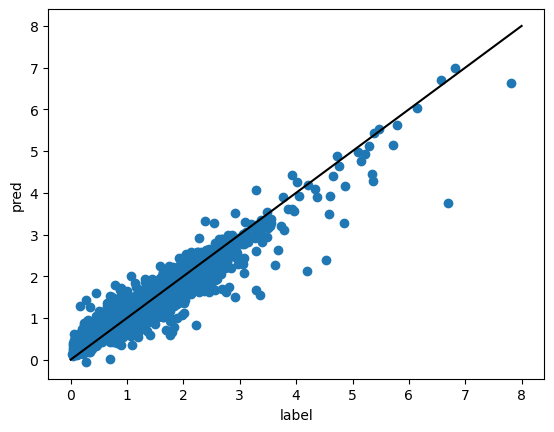

In [10]:
from sklearn.metrics import r2_score as r2
result_data.sort_values(by='id',inplace=True)
data.sort_values(by='id',inplace=True)
print('R2:',r2(data['SiO3'],result_data['Pred_SiO3']))
import matplotlib.pyplot as plt
plt.scatter(data['SiO3'],result_data['Pred_SiO3'])
plt.plot([i for i in range(9)],[i for i in range(9)],color='black')
plt.xlabel('label')
plt.ylabel('pred')
plt.show()

In [11]:
ana_data = pd.merge(data,result_data,on='id')

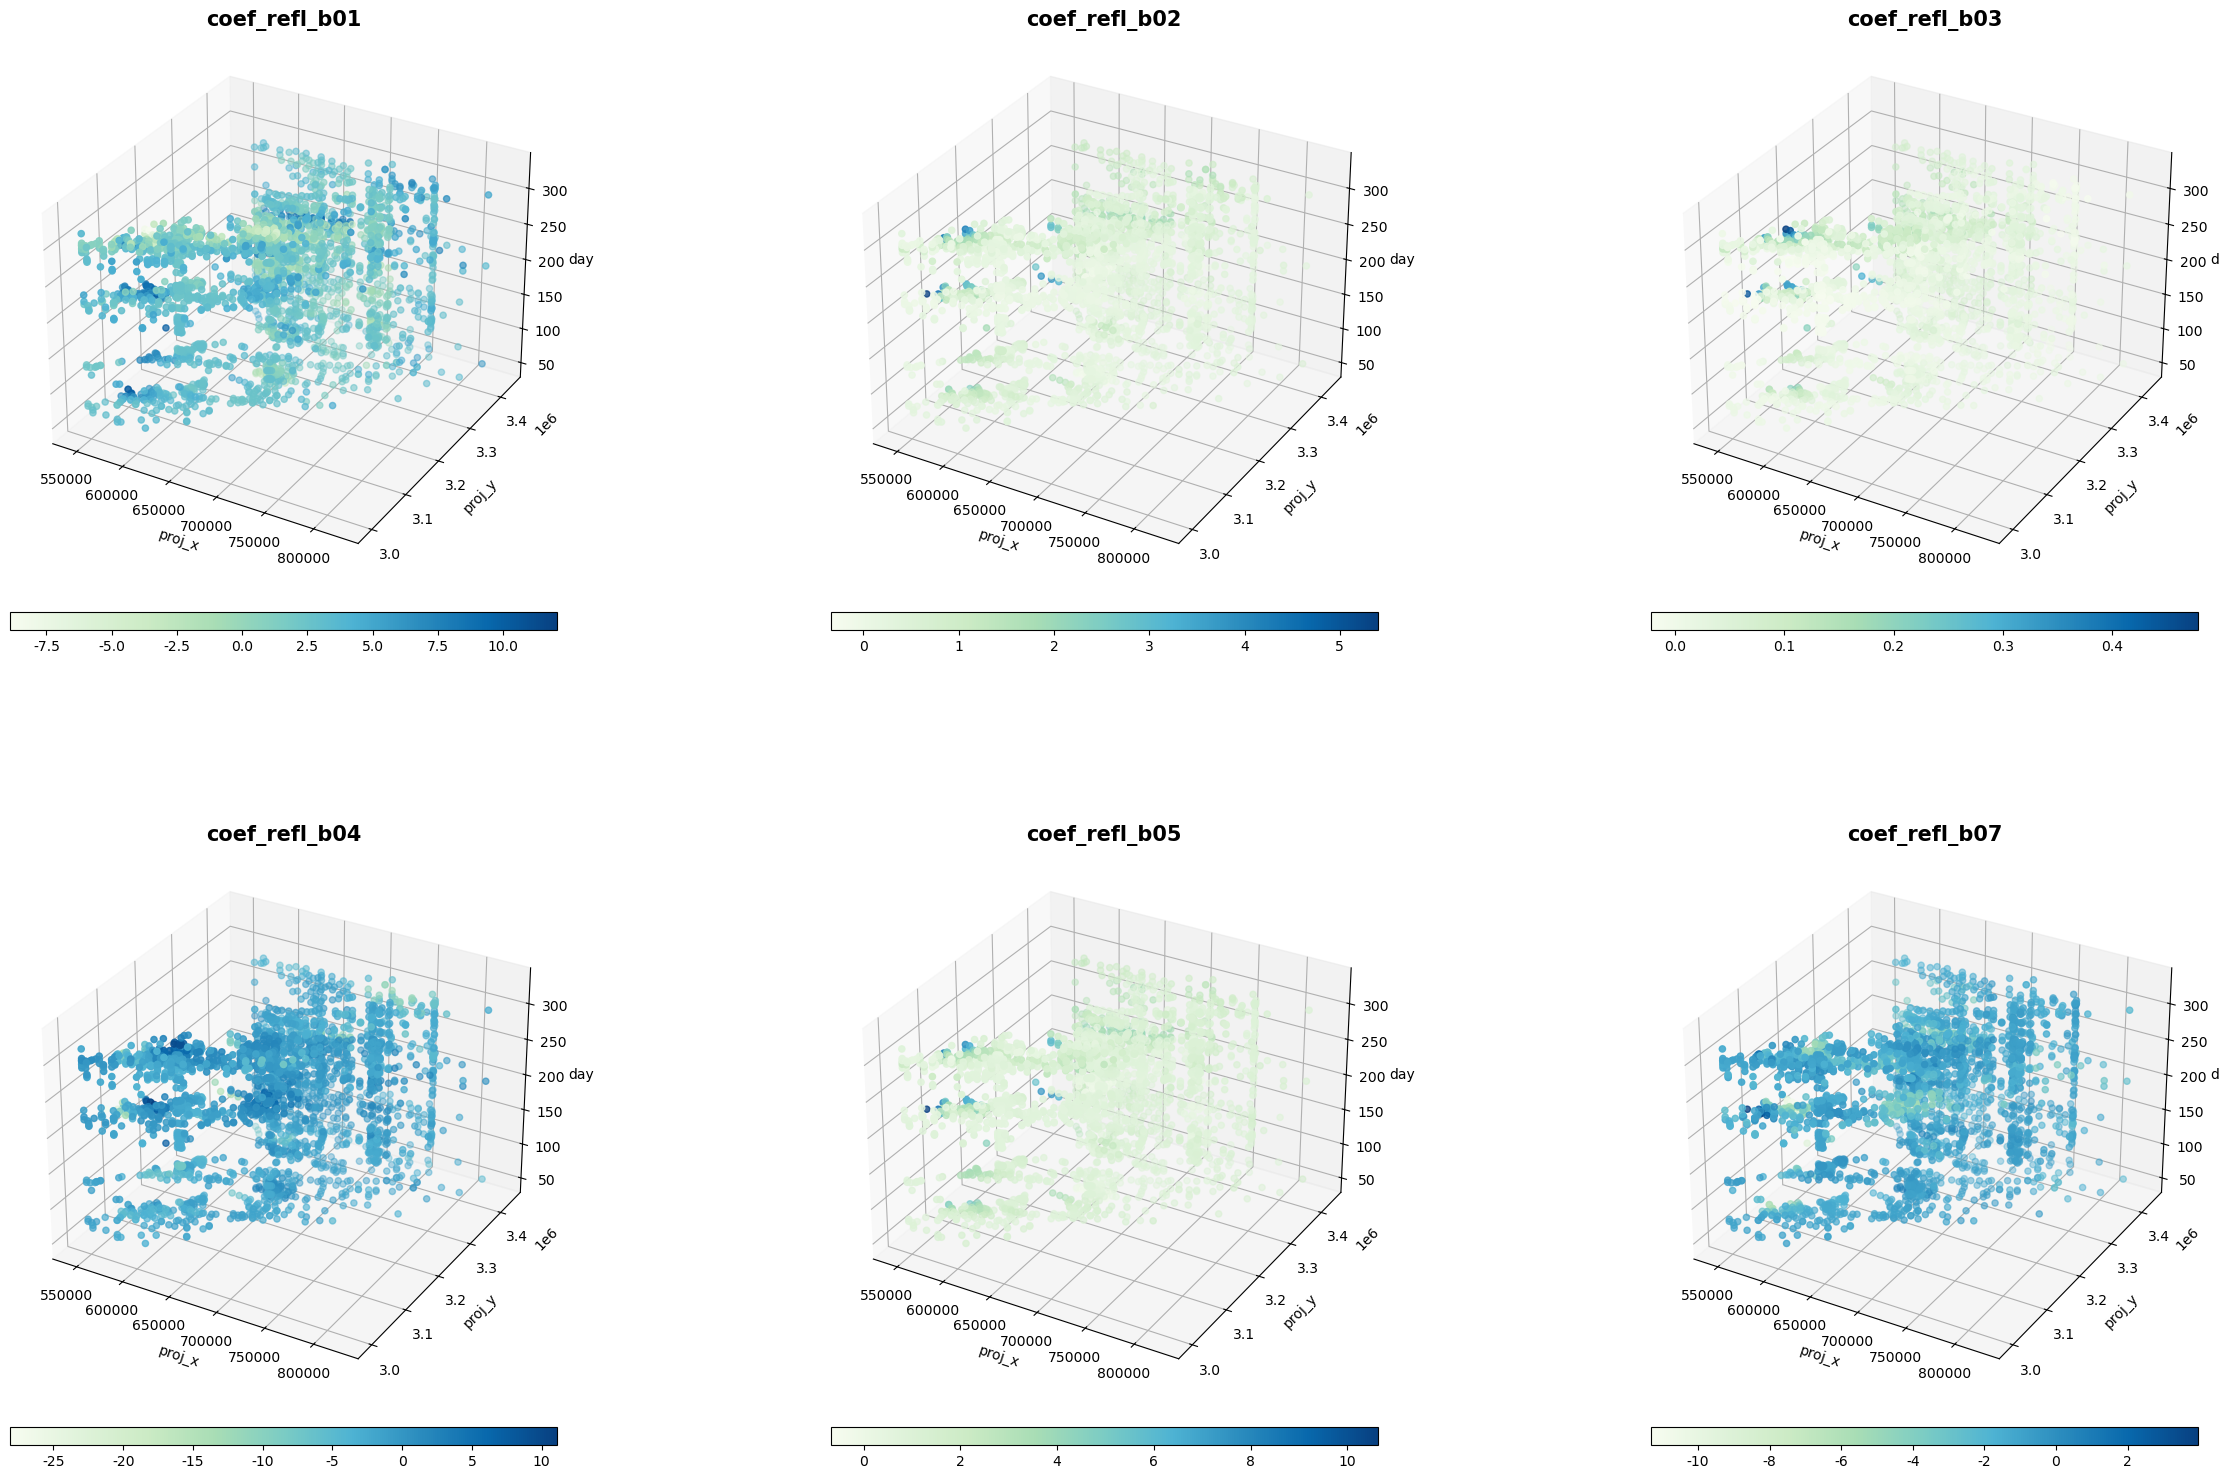

In [52]:
fig = plt.figure(figsize=(30,30))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
id = 1
for i in [1,2,3,4,5,7]:
    ax = fig.add_subplot(3,3,id,projection='3d')
    fig.colorbar(ax.scatter(ana_data['proj_x'],ana_data['proj_y'],ana_data['day'],
                            c=ana_data['coef_refl_b0'+str(i)],cmap='GnBu'),
                shrink=0.8,aspect=30,orientation='horizontal',pad=0.05)
    ax.set_xlabel('proj_x')
    ax.set_ylabel('proj_y')
    ax.set_zlabel('day')
    ax.set_title('coef_refl_b0'+str(i),fontsize=15,fontweight='bold')
    id+=1
    

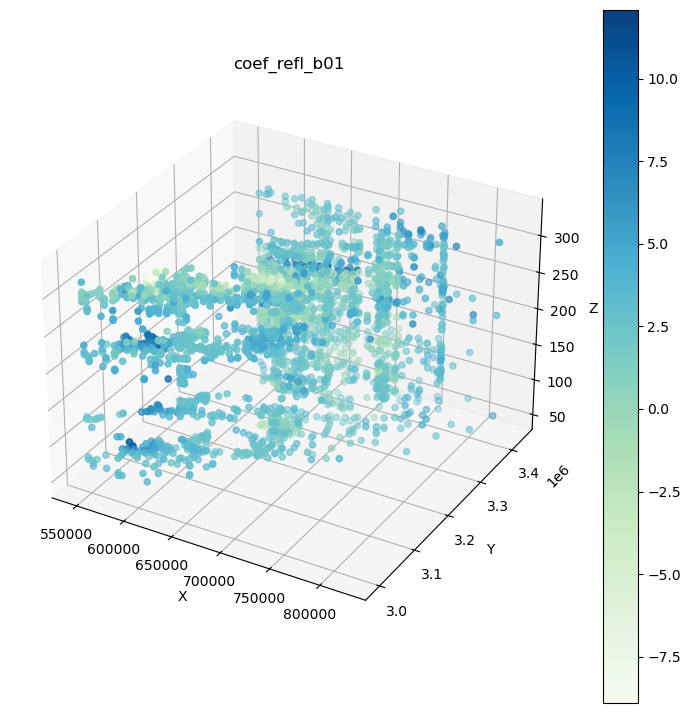

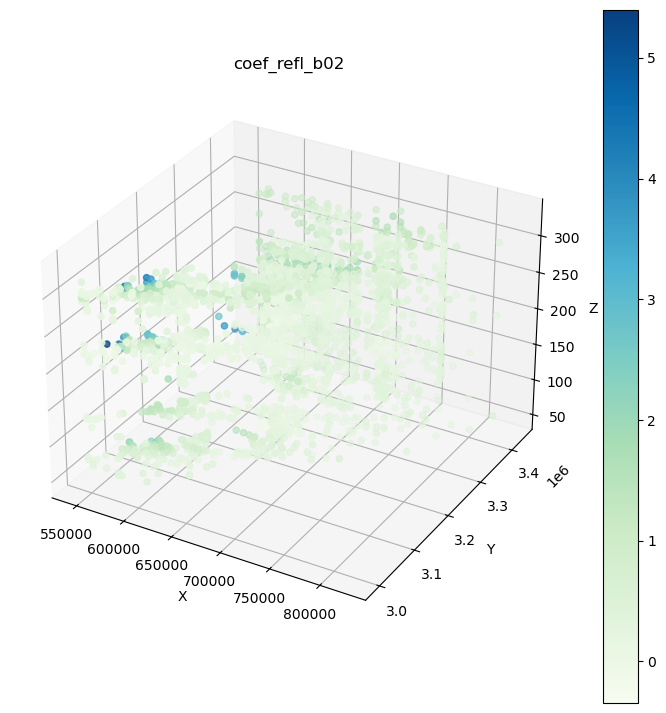

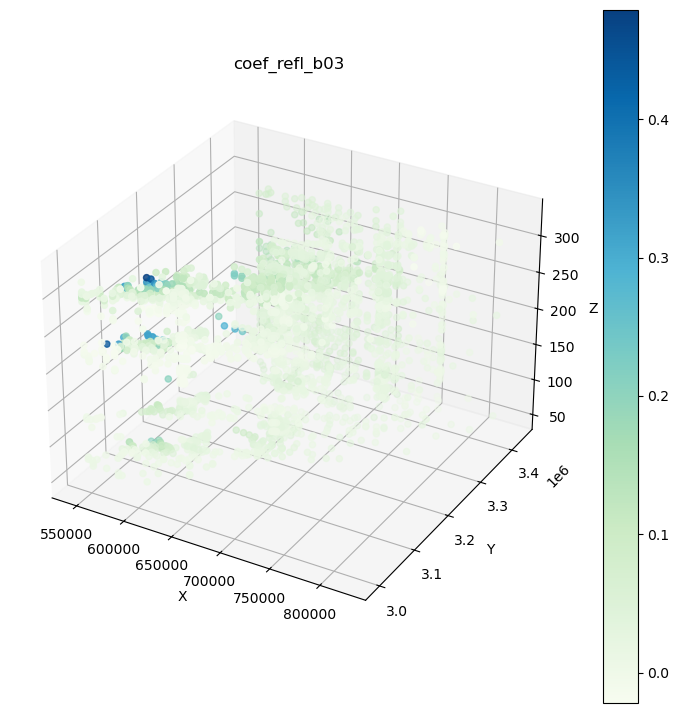

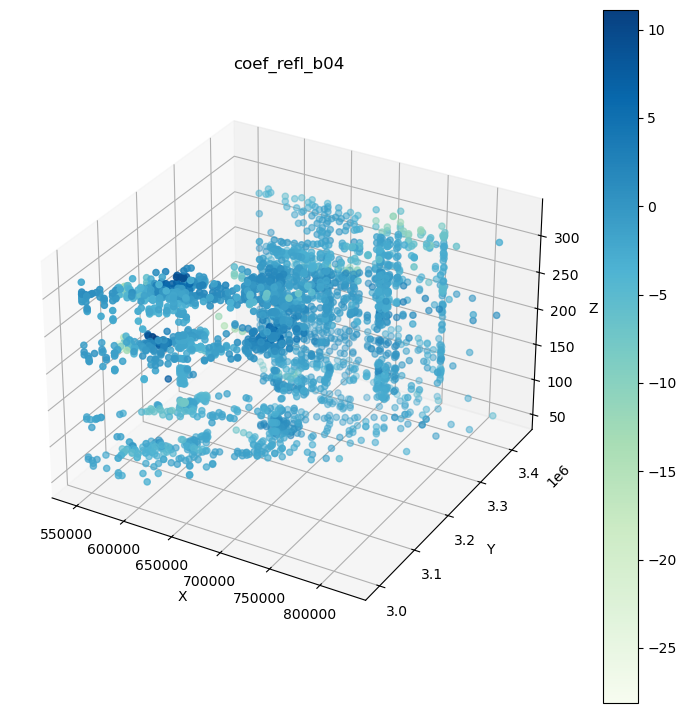

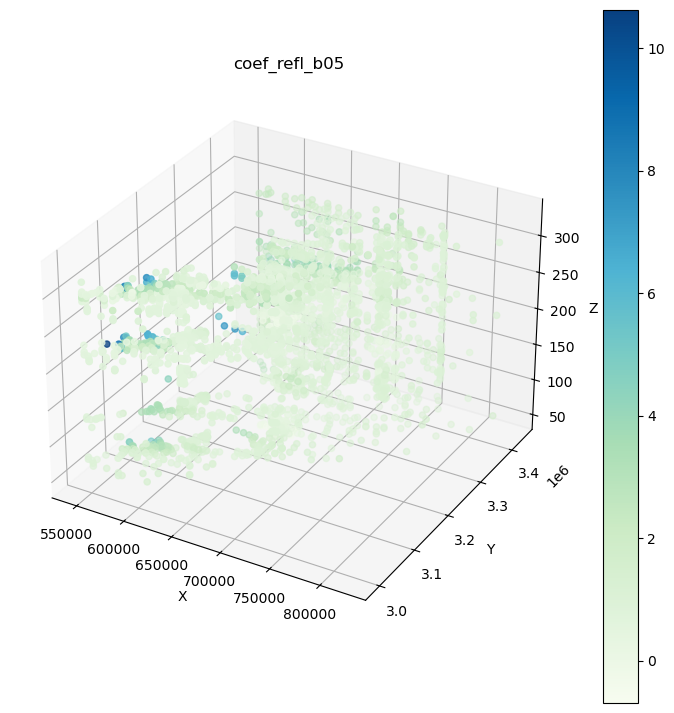

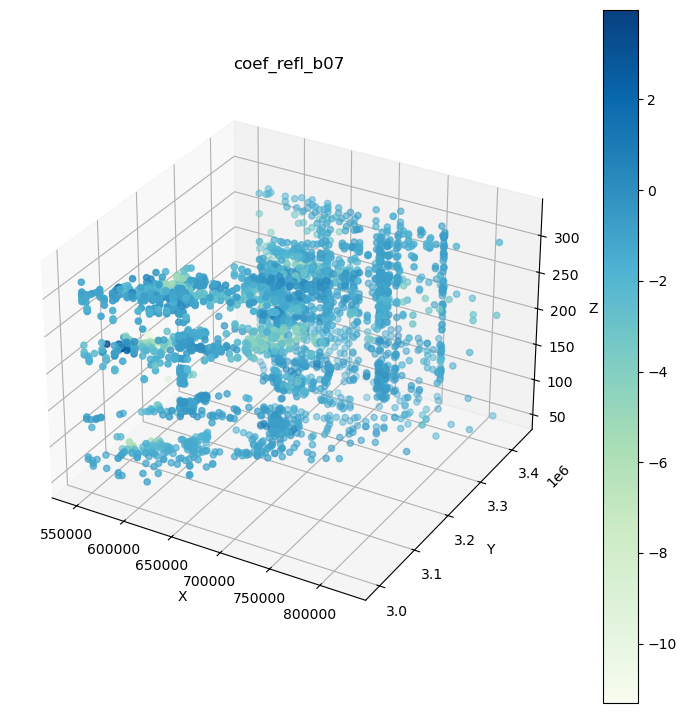

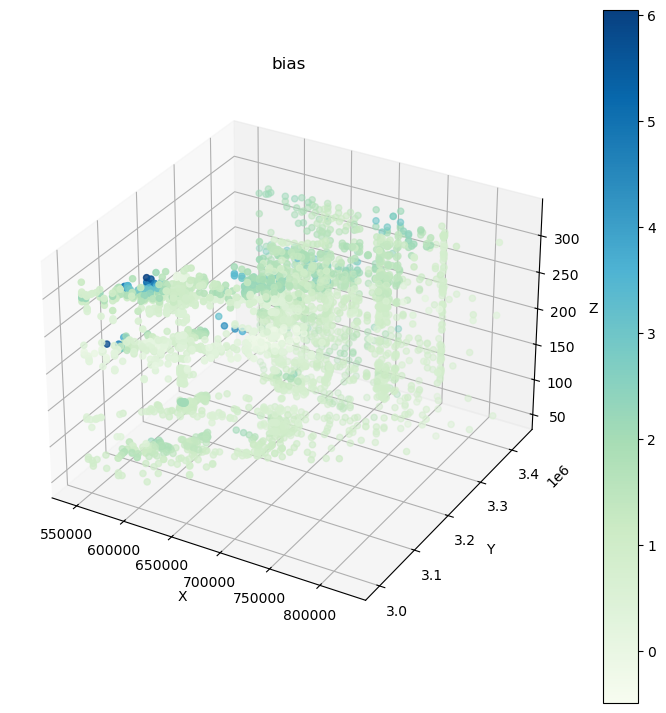

In [13]:
def plot_coef(name):
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111, projection='3d')
    fig.colorbar(ax.scatter(ana_data['proj_x'],ana_data['proj_y'],ana_data['day'],c=ana_data[name],cmap='GnBu'))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(name)
for i in [1,2,3,4,5,7]:
    plot_coef('coef_refl_b0'+str(i))
plot_coef('bias')